In [20]:
import shapely
#import os 
#os.chdir('C:/Users/Lenovo/Desktop/Master_BAOR/MSc Thesis')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pyproj
import pprint
import folium
from IPython.display import display
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show
from rasterio import features
import rasterstats
from shapely.geometry import shape
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

In [27]:
# Read the files including the district/mandal boundaries
district_bounds = gpd.read_file('C:/Users/mieke/OneDrive/Documenten/Master BAOR/MSc Thesis/GitHub repositories/dicra/src/data_preprocessing/tsdm/District_Boundary.shp')
mandal_bounds = gpd.read_file('C:/Users/mieke/OneDrive/Documenten/Master BAOR/MSc Thesis/GitHub repositories/dicra/src/data_preprocessing/tsdm/Mandal_Boundary.shp')

# Read the soil moisture raster
soil_moisture = "C:/Users/mieke/OneDrive/Documenten/Master BAOR/MSc Thesis/Data DiCRA/unzipped/SOILM_2022/RASTER/23-01-2022.tif"
soil = rasterio.open(soil_moisture, mode = 'r')

,Area,S_No,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_SC,...,F_SC,P_ST,M_ST,F_ST,Shape_Leng,Shape_Area,Mandal_Nam,Dist_Name,N_Revenue,geometry
0,255.0,415.0,37246.0,156067.0,79754.0,76313.0,17498.0,9151.0,8347.0,22004.0,...,10652.0,4146.0,2175.0,1971.0,0.958283,25307.330556,Abdullapurmet,Rangareddy,Ibrahimpatnam,"POLYGON ((78.59021 17.34506, 78.59009 17.34537..."
1,502.0,278.0,15679.0,69875.0,36019.0,33856.0,8986.0,4726.0,4260.0,11465.0,...,5714.0,20368.0,10829.0,9539.0,1.654335,50351.846895,Achampet,Nagarkurnool,Achampet,"POLYGON ((78.91204 16.54876, 78.91208 16.54716..."
2,126.0,298.0,4267.0,17249.0,8827.0,8422.0,2261.0,1193.0,1068.0,1325.0,...,637.0,7854.0,4087.0,3767.0,0.559979,12562.584646,Adavidevulapally,Nalgonda,Miryalaguda,"POLYGON ((79.52430 16.72522, 79.52860 16.72366..."
3,142.0,573.0,6618.0,25849.0,12901.0,12948.0,2482.0,1234.0,1248.0,6790.0,...,3374.0,179.0,95.0,84.0,0.534115,14181.307218,Addagudur,Yadadri Bhuvanagiri,Bhongiri,"POLYGON ((79.36517 17.48429, 79.36700 17.48308..."
4,134.0,201.0,6256.0,31224.0,15739.0,15485.0,4056.0,2061.0,1995.0,4310.0,...,2129.0,2399.0,1267.0,1132.0,0.650471,13465.631386,Addakal,Mahabubnagar,Mahabubnagar,"POLYGON ((77.92377 16.58074, 77.92404 16.58049..."


In [22]:
# Assign raster values to a numpy nd array
soil_array = soil.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = soil.transform
soil.meta
# Geographical coordinate reference system is used (4326)
soil.nodata # value which has been assigned for the nodata

-9999.0

In [23]:
# Calculating the zonal statistics on district level
# NOTE: stats must be any of these ['count', 'min', 'max', 'mean', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range', 'nodata', 'nan']
mean_soil = rasterstats.zonal_stats(district_bounds, soil_array, affine = affine, stats = ['mean'], geojson_out = True, nodata = soil.nodata)
# Extracting the landuse statistics from the list
avg_soil = []
i = 0
while i < len(mean_soil):
    avg_soil.append(mean_soil[i]['properties'])
    i = i + 1

In [24]:
# Extracting the soil statistics from the list (district level)
soil_stats = []
i = 0
while i < len(avg_soil):
    soil_stats.append(avg_soil[i]['mean'])
    i = i + 1

Text(81.58088832735892, 0.5, 'latitude')

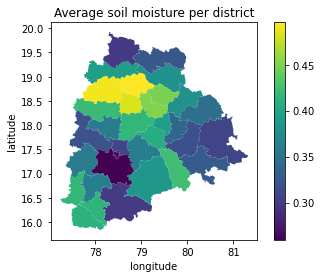

In [25]:
# Plot the average soil moister per district
district_bounds['Mean'] = soil_stats
district_bounds.plot(column = 'Mean', legend = True)
plt.title('Average soil moisture per district')
plt.xlabel('longitude')
plt.ylabel('latitude')

In [28]:
# Calculating the zonal statistics on mandal level
# NOTE: stats must be any of these ['count', 'min', 'max', 'mean', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range', 'nodata', 'nan']
mean_soil = rasterstats.zonal_stats(mandal_bounds, soil_array, affine = affine, stats = ['mean'], geojson_out = True, nodata = soil.nodata)
# Extracting the landuse statistics from the list
avg_soil = []
i = 0
while i < len(mean_soil):
    avg_soil.append(mean_soil[i]['properties'])
    i = i + 1

In [29]:
# Extracting the soil statistics from the list (mandal level)
soil_stats = []
i = 0
while i < len(avg_soil):
    soil_stats.append(avg_soil[i]['mean'])
    i = i + 1

Text(81.58088832735892, 0.5, 'latitude')

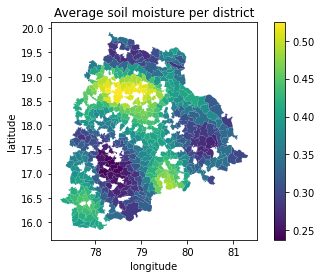

In [30]:
# Plot the average soil moisture per mandal
mandal_bounds['Mean'] = soil_stats
mandal_bounds.plot(column = 'Mean', legend = True)
plt.title('Average soil moisture per mandal')
plt.xlabel('longitude')
plt.ylabel('latitude')